# networkX tutorial

In [1]:
# import statements 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx       

## A little background on how graphs work in `networkX`

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In `networkX`, nodes can
be any hashable object (except `None`) e.g., a text string, an image, an XML object, another
`Graph`, a customized node object, etc. This would allow us to create some unique agent ID associated with each farmer or urban agent and have them as nodes.

## Generating graphs

You can generate graphs in different ways. You can build a graph node by node, or edge by edge. You can also generate graphs from existing adjacency matrices, numpy matrices or using a graph generator.

### Node by node and edge by edge

Text(0.5, 1.0, 'Nodes without edges')

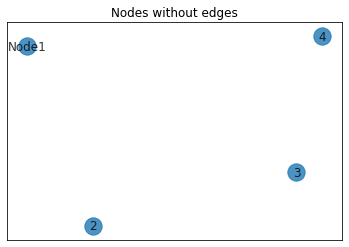

In [2]:
# instantiating an undirected, single-edge graph
G = nx.Graph()

# nodes can be strings -- careful! If you do 'add_nodes_from('Node1')' five new nodes will be added
G.add_node('Node1')

# nodes can be integers as well - so long as they are unique!
G.add_node(2)
G.add_nodes_from([3,4])

# adding a duplicate node does not work, though it doesn't throw an error
G.add_node(2)

# we can see a pretty simplistic view of the graph we have so far
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Nodes without edges')

Notice that nodes can be different in terms of data type. There is no `Node` object, rather each node is assigned some unique identifier, be it a string or integer or some hashable object. This graph is pretty basic -- let's add in some edges manually. We can do this in a similar fashion as how we've added in the nodes.

Text(0.5, 1.0, 'Adding in edge information manually')

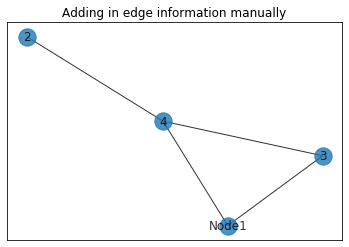

In [3]:
# we can add in a single edge
G.add_edge('Node1', 4)

# we can also pass in a list of tuples
G.add_edges_from([(2,4), ('Node1',3), (3,4)])

# let's look at the graph now
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Adding in edge information manually')

These are the basic functionalities of creating a graph manually. Of course there are more sophisticated ways these graphs can be created.

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods `G.remove_node()`, `G.remove_nodes_from()`, `G.remove_edge()` and `G.remove_edges_from()`, e.g.

### Importing a graph from an existing adjacency matrix


Let's get rid of the nodes and edges from the earlier example. If we try to draw an empty graph object, we get nothing!

Text(0.5, 1.0, 'Graph clear function')

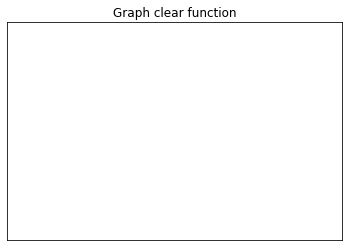

In [4]:
G.clear()
nx.draw_networkx(G)
plt.title('Graph clear function')

Let's make a sample adjacency list by just writing to a file. The format of the list starts with the source node, and each subsequent is the node connected to the source. In the following code, `node1` is connected to `node2` and `node3`, and `node6` is connected to `node2`.

In [5]:
# this will create a file in the current directory
f = open('adjacency_read.txt', 'w')
f.write('node1 node2 node3 \nnode6 node2 node3 \nnode7')
f.close()

Now we can use this file to write to a graph.

Text(0.5, 1.0, 'Reading graph in from adjacency_read.txt')

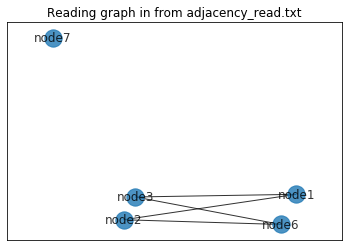

In [6]:
G = nx.readwrite.adjlist.read_adjlist('adjacency_read.txt')
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Reading graph in from adjacency_read.txt')

We can also write this adjacency list to a file from the `Graph` directly.

In [7]:
# this will write out a file in your current directory
nx.readwrite.adjlist.write_adjlist(G, 'adjacency_write.txt')

We'll read it in again to make sure it matches with the above graph.

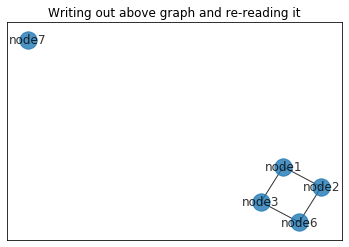

In [8]:
H = nx.readwrite.adjlist.read_adjlist('adjacency_write.txt')
nx.draw_networkx(H, with_labels=True, alpha = 0.8)
plt.title('Writing out above graph and re-reading it')

# clearing out all old node and edge data while maintaing graph structure
G.clear()
H.clear()

Yep! It matches! (even though the graph portrayal may look different.)

**Note:** When reading and writing adjacency lists, node data could be lost. For example, if each node had an attribute we cared about besides its node identifier, there is no way to pass that through in an adjacency list. This only transfers information about the relationships between nodes, and not about the nodes themselves.

### Using `numpy` matrices as adjacency matrices

[[0 0 0 1]
 [0 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]


Text(0.5, 1.0, 'Reading in a graph from a numpy matrix')

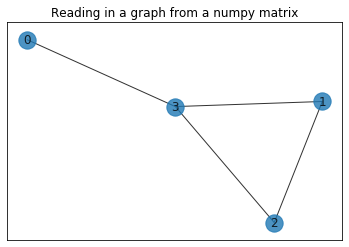

In [9]:
A = np.array([[0, 0, 0, 1], [0, 0, 1, 1], [0,1,0,1], [1,1,1,0]])
G = nx.from_numpy_matrix(A)
print(A)
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Reading in a graph from a numpy matrix')

Conversely, we can export this graph's adjacency matrix to a `numpy` matrix.

In [10]:
B = nx.to_numpy_matrix(G)
print(B)

[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]]


### Random graph generators

#### Erdos Renyi Graph
There are many types of graph generators that can be accessed [here](https://networkx.github.io/documentation/stable/reference/generators.html#module-networkx.generators.random_graphs). I'll start with the [Erdos-Renyi graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph) that Vicken has mentioned.

To call, use:

`nx.generators.random_graphs.erdos_renyi_graph(n, p, seed=None, directed=False)` 

where 

`n` is number of nodes

`p` is probability of edge creation

`seed` (default is `None`) is the indicator of random number generation

`directed` (default is `False`) is a `bool` type indicating if the graph has directional edges. 

Text(0.5, 1.0, 'Erdos-Renyi Random Graph Generator')

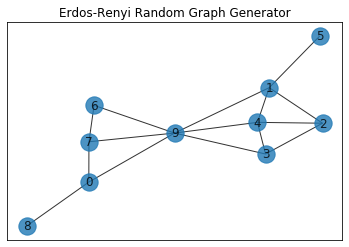

In [11]:
# clearing out old graph data (not necessary but want to keep consistent)
G.clear()

# number of nodes
n = 10
p = 0.3   # feel free to play around with this
seed = 19 # optional
directed = False # optional 
G = nx.generators.random_graphs.erdos_renyi_graph(n, p, seed, directed)
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Erdos-Renyi Random Graph Generator')

#### Barabasi-Albert
Another similar graph generator. See [here](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html). You can call it by using `nx.generators.random_graphs.barabasi_albert_graph(n, m, seed=None)`

According to the documentation, it will return: 
> A graph of `n` nodes which is grown by attaching new nodes each with `m` edges that are preferentially attached to existing nodes with high degree.

**Note!** `m` must always be $\geq 1$ and $ <$ `n`

Vicken might need to help explain what some of this means and how this fits into our research question.

Text(0.5, 1.0, 'Barabasi-Albert Graph')

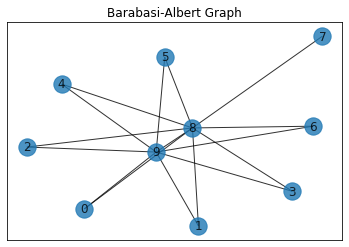

In [12]:
# clearing out old graph data
G.clear()

# we'll keep the same number of nodes and seed as before
m = 8
G = nx.generators.random_graphs.barabasi_albert_graph(n,m,seed)

# plotting
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Barabasi-Albert Graph')

#### Watts-Strogatz small-world graph

See [here](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html). 

Can be called using `nx.generators.random_graphs.watts_strogatz_graph(n,k,p,seed=None)`

According to the documentation:
> First create a ring over `n` nodes. Then each node in the ring is connected with its `k` nearest neighbors (`k-1` neighbors if `k` is odd). Then shortcuts are created by replacing some edges as follows: for each edge u-v in the underlying “`n`-ring with `k` nearest neighbors” with probability `p` replace it with a new edge u-w with uniformly random choice of existing node w.

Text(0.5, 1.0, 'Watts-Strogatz Graph')

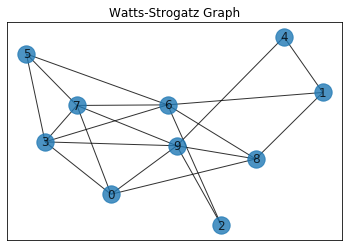

In [13]:
# clearing out old graph data
G.clear()

# we'll keep the same number of nodes and seed as before
k = 5
p = 0.7
G = nx.generators.random_graphs.watts_strogatz_graph(n,k,p,seed)

# plotting
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Watts-Strogatz Graph')

## Accessing graph information

Once the graph structure is created, there are a lot of ways you can access information about the graph. I'll continue using the Watts-Strogatz graph from earlier to demonstrate. As shown above, you can manipulate and add/remove edges individual or through lists from existing graphs.

### Accessing edges and neighbors

In [14]:
# you can access using subscript notation
print(G[1])

# or you can access using .adj[<node>]
print(G.adj[1])

{8: {}, 4: {}, 6: {}}
{8: {}, 4: {}, 6: {}}


I've set no edge information. If there was edge information between 1 and 8, the `{}` would contain that information. Additionally, you can set the edge attributes on an existing edge.

In [15]:
# adding a random edge attribute of weight 
G[1][8]['weight'] = 0.8

print(G[1][8])
print('This is a dictionary.\n')
print(G[1])
print('This is a dictionary of dictionaries.')

{'weight': 0.8}
This is a dictionary.

{8: {'weight': 0.8}, 4: {}, 6: {}}
This is a dictionary of dictionaries.


**Note!** Attributes are stored in a `dict` data structure. The nodes and their edge information are stored in a `dict` of `dict`s. This can be confusing -- be careful!

### Accessing nodes and node attributes

In [16]:
print(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [17]:
# accessing nodes and attributes (so far there are no attributes)
G.nodes.data()

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

In [18]:
# we can also specify which node attribute we want
# we have no node attribute called weight
nx.get_node_attributes(G, 'weight')

{}

## Adding attributes to graphs, nodes, edges
By default, when a random graph generator is called, the attributes for edges and nodes are empty. But each graph, node, and edge can hold attributes that can be any *hashable* Python object.

### Graph attributes

In [19]:
# adding graph attribute after it has been created
G.graph['year'] = 1970
G.graph['location'] = 'Idaho'

print('This is another dictionary!')
G.graph

This is another dictionary!


{'year': 1970, 'location': 'Idaho'}

### Node attributes

In [20]:
# adding in node attribute 'agentID'
G.nodes[1]['agentID'] = 1001
G.nodes[2]['agentID'] = 1002

G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [21]:
# there should now be those attributes to the nodes
G.nodes.data()

NodeDataView({0: {}, 1: {'agentID': 1001}, 2: {'agentID': 1002}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

In [22]:
# you can also call this to return another dict
nx.get_node_attributes(G, 'agentID')

{1: 1001, 2: 1002}

In [23]:
type(nx.get_node_attributes(G, 'agentID'))

dict

Additionally, you can set node attributes in a similar fashion. I don't want to mess with our existing example graph `G`, so I'll create another undirected graph `H`, and add all nodes and edges from `G`. This will basically gives us a copy of `G` with no attributes.

In [24]:
H = nx.Graph()
H.add_nodes_from(G)
H.add_edges_from(G.edges) # be careful with this notation

Text(0.5, 1.0, 'Copy of graph with no attributes')

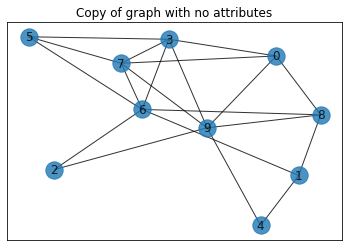

In [25]:
# plotting H
nx.draw_networkx(H, with_labels = True, alpha=0.8)
plt.title('Copy of graph with no attributes')

In [26]:
# setting up node attributes but they need to be in dict form
agent_ids = np.arange(1000,1010)
agent_id_dict = dict(enumerate(agent_ids))
agent_id_dict

{0: 1000,
 1: 1001,
 2: 1002,
 3: 1003,
 4: 1004,
 5: 1005,
 6: 1006,
 7: 1007,
 8: 1008,
 9: 1009}

The `dict` structure must be such that each `key` is the same as the `node` name, which in our case, is incremented by 1 from 0 in the random graph generators. Therefore, we can use enumerate to assign the agentID values to the nodes easily

Text(0.5, 1.0, 'Graph with agentID attribute plotted')

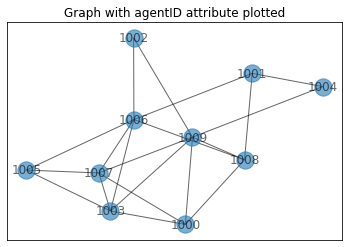

In [27]:
# setting node attributes
nx.set_node_attributes(H, agent_id_dict, 'agentID')

# showing graph with agentID attribute for the nodes
# see below for an explanation
labels = nx.get_node_attributes(H, 'agentID')
nx.draw_networkx(H, labels = labels, alpha=0.6)
plt.title('Graph with agentID attribute plotted')

### Relabeling nodes
Maybe instead of making `agentID` an attribute, we want to completely make that the `Node` identifier itself.

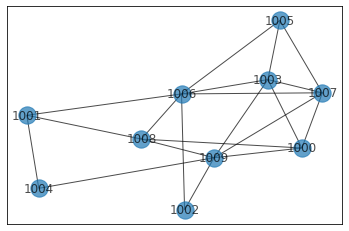

In [28]:
# resetting attribute data
H.clear()

# will return a copy instead of manipulating G (we will use G later)
H = nx.relabel.relabel_nodes(G, agent_id_dict, copy=True)

# plot
nx.draw_networkx(H, with_labels=True, alpha=0.7)

In [29]:
# we can see that the graph structure here has nodes now that are agentIDs
H.nodes

NodeView((1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009))

### Edge attributes

In [30]:
# adding in more weight attributes
G[3][7]['weight'] = 0.2

# does not need to be in any particular order for a directionless graph
G[7][0]['weight'] = 0.6

# all attributes for node 3
G[3]

AtlasView({5: {}, 0: {}, 6: {}, 7: {'weight': 0.2}, 9: {}})

In [31]:
# all attributes for node 7
G[7]

AtlasView({6: {}, 5: {}, 9: {}, 3: {'weight': 0.2}, 0: {'weight': 0.6}})

In [32]:
# you can also access a graph's edge attributes by name in dict form
nx.get_edge_attributes(G, 'weight')

{(0, 7): 0.6, (1, 8): 0.8, (3, 7): 0.2}

In [33]:
type(nx.get_edge_attributes(G, 'weight'))

dict

### Visualizing attributes with `nx.draw_networkx`
First, it's important to use `draw_networkx` if we need compatibility with `matplotlib.pyplot` (as opposed to just `nx.draw()`). Solution was found [here](https://stackoverflow.com/questions/3982819/networkx-node-attribute-drawing). A useful tip: use `nx.get_node_attributes()`

Text(0.5, 1.0, 'Graph with agentID plotted')

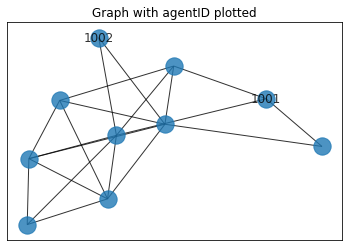

In [34]:
# we need to set up the labels to be equal to the node attributes
labels = nx.get_node_attributes(G, 'agentID')
nx.draw_networkx(G, labels = labels, alpha=0.8)
plt.title('Graph with agentID plotted')

There's a not-so-pretty workaround for including edge and node attributes into a graph that can be found [here](https://stackoverflow.com/questions/20381460/networkx-how-to-show-node-and-edge-attributes-in-a-graph-drawing).

## Takeaways
* Graph generators make a very simplistic graph object which we can manipulate later
* There are different ways you can access important information about the `Graph`, `Nodes` and `Edges`
* There is a lot of flexibility in this package -- how we choose to use it goes back to the research question
* Node options using `nx.relabel.relabel_nodes()`: 
    * `agentID` 
    * `farmer` or `urban` agent (likely much more complicated but very robust)
* Node option without relabeling nodes
    * built in `int` with `agentID` as an attribute 